In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)


# STEP 1 SYNTHETIC DATA GENERATION(10 CHANNELS * 365 DAYS)


# Fixed channel characteristics (as per paper Table 2, 17, 18)
channel_data = {
    "Channel 1": {"depth": 226, "length": 10000, "width": 500},
    "Channel 2": {"depth": 129, "length": 7000, "width": 300},
    "Channel 3": {"depth": 33, "length": 5000, "width": 450},
    "Channel 4": {"depth": 354, "length": 9000, "width": 250},
    "Channel 5": {"depth": 427, "length": 14500, "width": 350},
    "Channel 6": {"depth": 122, "length": 11000, "width": 600},
    "Channel 7": {"depth": 190, "length": 8250, "width": 400},
    "Channel 8": {"depth": 275, "length": 6500, "width": 300},
    "Channel 9": {"depth": 381, "length": 10500, "width": 250},
    "Channel 10": {"depth": 80, "length": 15000, "width": 400}
}

channels = list(channel_data.keys())
days = 365

# Generate synthetic data
data_list = []
for channel in channels:
    for day in range(1, days + 1):
        record = {
            "Channel": channel,
            "Day": day,
            "Depth": channel_data[channel]["depth"],
            "Length": channel_data[channel]["length"],
            "Width": channel_data[channel]["width"],
            # Platform detections (daily observations)
            "Frigates": max(0, int(np.random.normal(5, 3))),
            "Corvettes": max(0, int(np.random.normal(5, 3))),
            "Attack_Boats": max(0, int(np.random.normal(10, 4))),
            "Submarines": max(0, int(np.random.normal(2, 1))),
            "Aircraft": max(0, int(np.random.normal(10, 2))),
            "Amphibious_Ships": max(0, int(np.random.normal(3, 2))),
            "Autonomous_Vehicles": max(0, int(np.random.normal(8, 2))),
            "Civil_Boats": max(0, int(np.random.normal(20, 3))),
            "Auxiliary_Ships": max(0, int(np.random.normal(9, 2))),
        }
        data_list.append(record)

df = pd.DataFrame(data_list)


# 2. COMPLETE SCORING SYSTEM

def score_depth(d):
    if d <= 100: return 5
    elif d <= 200: return 4
    elif d <= 300: return 3
    elif d <= 400: return 2
    elif d <= 500: return 1
    else: return 0

def score_frigates_corvettes(f):
    if f >= 7: return 5
    elif f >= 6: return 4
    elif f >= 4: return 3
    elif f >= 3: return 2
    elif f >= 1: return 1
    else: return 0

def score_attack_boats(a):
    if a >= 14: return 5
    elif a >= 11: return 4
    elif a >= 8: return 3
    elif a >= 6: return 2
    elif a >= 3: return 1
    else: return 0

def score_submarines(s):
    if s >= 3: return 5
    elif s >= 2: return 4
    elif s >= 1: return 2
    else: return 0

def score_aircraft(a):
    if a >= 12: return 5
    elif a >= 10: return 4
    elif a >= 7: return 3
    elif a >= 5: return 2
    elif a >= 3: return 1
    else: return 0

def score_amphibious_ships(a):
    if a >= 5: return 5
    elif a >= 4: return 4
    elif a >= 3: return 3
    elif a >= 2: return 2
    elif a >= 1: return 1
    else: return 0

def score_autonomous_vehicles(a):
    if a >= 8: return 5
    elif a >= 7: return 4
    elif a >= 6: return 3
    elif a >= 4: return 2
    elif a >= 2: return 1
    else: return 0

def score_civil_boats(c):
    if c >= 21: return 5
    elif c >= 17: return 4
    elif c >= 14: return 3
    elif c >= 8: return 2
    elif c >= 5: return 1
    else: return 0

def score_auxiliary_ships(a):
    if a >= 9: return 5
    elif a >= 8: return 4
    elif a >= 7: return 3
    elif a >= 5: return 2
    elif a >= 2: return 1
    else: return 0

# Apply scoring functions
df["Depth_Score"] = df["Depth"].apply(score_depth)
df["Frigates_Score"] = df["Frigates"].apply(score_frigates_corvettes)
df["Corvettes_Score"] = df["Corvettes"].apply(score_frigates_corvettes)
df["Attack_Boats_Score"] = df["Attack_Boats"].apply(score_attack_boats)
df["Submarines_Score"] = df["Submarines"].apply(score_submarines)
df["Aircraft_Score"] = df["Aircraft"].apply(score_aircraft)
df["Amphibious_Ships_Score"] = df["Amphibious_Ships"].apply(score_amphibious_ships)
df["Autonomous_Vehicles_Score"] = df["Autonomous_Vehicles"].apply(score_autonomous_vehicles)
df["Civil_Boats_Score"] = df["Civil_Boats"].apply(score_civil_boats)
df["Auxiliary_Ships_Score"] = df["Auxiliary_Ships"].apply(score_auxiliary_ships)


# 3. MINING PROBABILITY CALCULATION

# Weights from Table 13
weights = {
    "Depth": 0.3,
    "Frigates": 0.04,
    "Corvettes": 0.04,
    "Attack_Boats": 0.04,
    "Submarines": 0.04,
    "Aircraft": 0.04,
    "Amphibious_Ships": 0.1,
    "Autonomous_Vehicles": 0.15,
    "Civil_Boats": 0.15,
    "Auxiliary_Ships": 0.1,
}

# Calculate mining probability using Formula (1) from paper
df["Mining_Probability"] = (
    df["Depth_Score"] * weights["Depth"] +
    df["Frigates_Score"] * weights["Frigates"] +
    df["Corvettes_Score"] * weights["Corvettes"] +
    df["Attack_Boats_Score"] * weights["Attack_Boats"] +
    df["Submarines_Score"] * weights["Submarines"] +
    df["Aircraft_Score"] * weights["Aircraft"] +
    df["Amphibious_Ships_Score"] * weights["Amphibious_Ships"] +
    df["Autonomous_Vehicles_Score"] * weights["Autonomous_Vehicles"] +
    df["Civil_Boats_Score"] * weights["Civil_Boats"] +
    df["Auxiliary_Ships_Score"] * weights["Auxiliary_Ships"]
) / 5.0  # Normalize to [0,1] as per formula


# 4. DATA VALIDATION & SUMMARY


print(f"Dataset shape: {df.shape}")
print(f"Channels: {df['Channel'].unique()}")
print(f"Mining probability range: {df['Mining_Probability'].min():.3f} - {df['Mining_Probability'].max():.3f}")

# Channel-wise mining probability summary
channel_summary = df.groupby('Channel')['Mining_Probability'].agg(['mean', 'std', 'min', 'max'])
print("\nChannel Mining Probability Summary:")
print(channel_summary.round(3))

# Save dataset
df.to_csv("naval_mine_warfare_dataset.csv", index=False)
print("\nDataset saved as 'naval_mine_warfare_dataset.csv'")

# Display first few rows
print("\nFirst 10 rows of the dataset:")
print(df[['Channel', 'Day', 'Depth', 'Frigates', 'Mining_Probability']].head(10))
df.head()

Dataset shape: (3650, 25)
Channels: ['Channel 1' 'Channel 2' 'Channel 3' 'Channel 4' 'Channel 5' 'Channel 6'
 'Channel 7' 'Channel 8' 'Channel 9' 'Channel 10']
Mining probability range: 0.366 - 0.968

Channel Mining Probability Summary:
             mean    std    min    max
Channel                               
Channel 1   0.685  0.062  0.526  0.832
Channel 10  0.796  0.068  0.552  0.944
Channel 2   0.737  0.063  0.512  0.892
Channel 3   0.797  0.065  0.624  0.968
Channel 4   0.617  0.061  0.444  0.772
Channel 5   0.561  0.064  0.366  0.728
Channel 6   0.741  0.063  0.546  0.892
Channel 7   0.735  0.062  0.564  0.912
Channel 8   0.676  0.066  0.490  0.848
Channel 9   0.616  0.067  0.426  0.788

Dataset saved as 'naval_mine_warfare_dataset.csv'

First 10 rows of the dataset:
     Channel  Day  Depth  Frigates  Mining_Probability
0  Channel 1    1    226         6               0.752
1  Channel 1    2    226         6               0.580
2  Channel 1    3    226         2              

,Channel,Day,Depth,Length,Width,Frigates,Corvettes,Attack_Boats,Submarines,Aircraft,...,Frigates_Score,Corvettes_Score,Attack_Boats_Score,Submarines_Score,Aircraft_Score,Amphibious_Ships_Score,Autonomous_Vehicles_Score,Civil_Boats_Score,Auxiliary_Ships_Score,Mining_Probability
0,Channel 1,1,226,10000,500,6,4,12,3,9,...,4,3,4,5,3,2,5,5,4,0.752
1,Channel 1,2,226,10000,500,6,3,8,2,6,...,4,2,3,4,2,0,3,3,5,0.580
2,Channel 1,3,226,10000,500,2,0,15,1,10,...,1,0,5,2,4,0,3,4,2,0.526
3,Channel 1,4,226,10000,500,6,3,8,1,13,...,4,2,3,2,5,2,2,5,2,0.598
4,Channel 1,5,226,10000,500,5,0,4,2,11,...,3,0,1,4,4,3,4,4,2,0.616


Dataset loaded: (3650, 25)
Mining probability range: 0.366 - 0.968


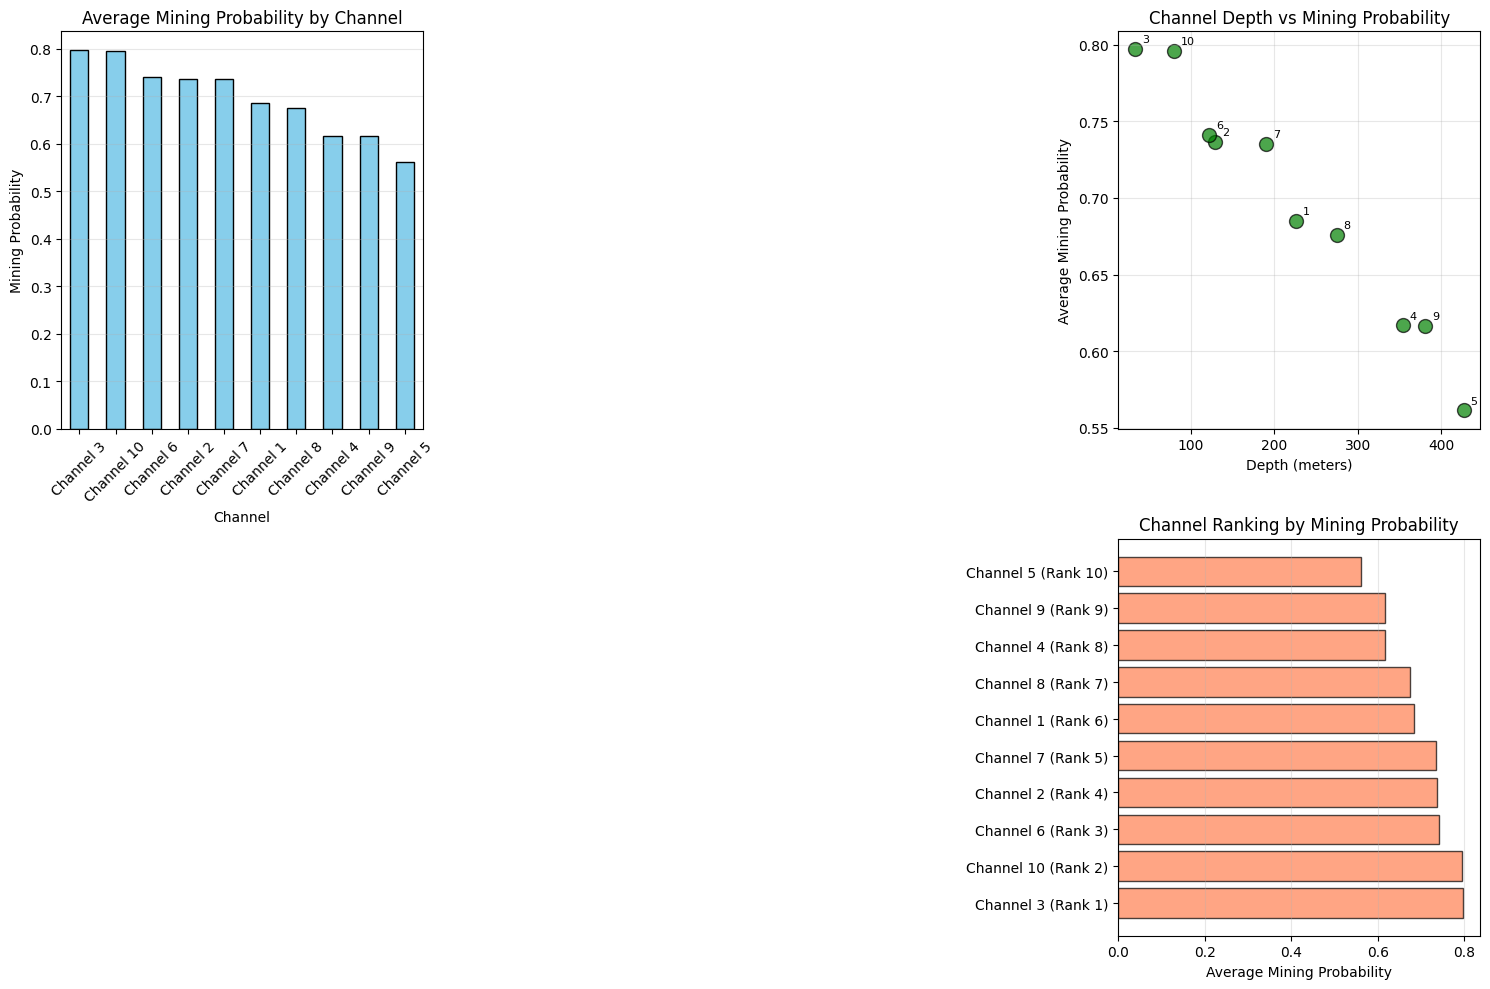

DATASET SUMMARY STATISTICS

Total records: 3,650
Channels: 10
Time period: 365 days

Channel Physical Characteristics:
            Depth  Length  Width
Channel                         
Channel 1     226   10000    500
Channel 10     80   15000    400
Channel 2     129    7000    300
Channel 3      33    5000    450
Channel 4     354    9000    250
Channel 5     427   14500    350
Channel 6     122   11000    600
Channel 7     190    8250    400
Channel 8     275    6500    300
Channel 9     381   10500    250


In [146]:
# DATA VISUALIZATION AND PATTERN ANALYSIS


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv("naval_mine_warfare_dataset.csv")

print(f"Dataset loaded: {df.shape}")
print(f"Mining probability range: {df['Mining_Probability'].min():.3f} - {df['Mining_Probability'].max():.3f}")

# 1. CHANNEL-WISE MINING PROBABILITY STATISTICS

plt.figure(figsize=(15, 10))

# Average mining probability per channel
plt.subplot(2, 3, 1)
channel_avg = df.groupby('Channel')['Mining_Probability'].mean().sort_values(ascending=False)
channel_avg.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Mining Probability by Channel')
plt.ylabel('Mining Probability')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)



# Channel depth vs mining probability
plt.subplot(2, 3, 3)
channel_depth = df.groupby('Channel')['Depth'].first()
channel_mining = df.groupby('Channel')['Mining_Probability'].mean()
plt.scatter(channel_depth, channel_mining, s=100, color='green', alpha=0.7, edgecolors='black')
plt.title('Channel Depth vs Mining Probability')
plt.xlabel('Depth (meters)')
plt.ylabel('Average Mining Probability')
for i, channel in enumerate(channel_depth.index):
    plt.annotate(channel.split()[1], (channel_depth.iloc[i], channel_mining.iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=8)
plt.grid(True, alpha=0.3)


# Calculate Total_Platforms
df['Total_Platforms'] = df[[
    "Frigates", "Corvettes", "Attack_Boats", "Submarines",
    "Aircraft", "Amphibious_Ships", "Autonomous_Vehicles",
    "Civil_Boats", "Auxiliary_Ships"
]].sum(axis=1)

# Channel ranking by different metrics
plt.subplot(2, 3, 6)
channel_metrics = df.groupby('Channel').agg({
    'Mining_Probability': 'mean',
    'Total_Platforms': 'mean',
    'Depth': 'first'
}).round(3)

# Rank channels by mining probability
channel_metrics['Mining_Rank'] = channel_metrics['Mining_Probability'].rank(ascending=False)
channel_metrics_sorted = channel_metrics.sort_values('Mining_Rank')

plt.barh(range(len(channel_metrics_sorted)), channel_metrics_sorted['Mining_Probability'],
         color='coral', alpha=0.7, edgecolor='black')
plt.title('Channel Ranking by Mining Probability')
plt.xlabel('Average Mining Probability')
plt.yticks(range(len(channel_metrics_sorted)),
           [f"{ch} (Rank {int(rank)})" for ch, rank in
            zip(channel_metrics_sorted.index, channel_metrics_sorted['Mining_Rank'])])
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()



print("DATASET SUMMARY STATISTICS")

print(f"\nTotal records: {len(df):,}")
print(f"Channels: {df['Channel'].nunique()}")
print(f"Time period: {df['Day'].nunique()} days")

print(f"\nChannel Physical Characteristics:")
chars_summary = df.groupby('Channel')[['Depth', 'Length', 'Width']].first()
print(chars_summary)

/tmp/ipython-input-3838270388.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(["Channel", "Ship_Bins"])["Predicted_Probability"].mean().unstack()


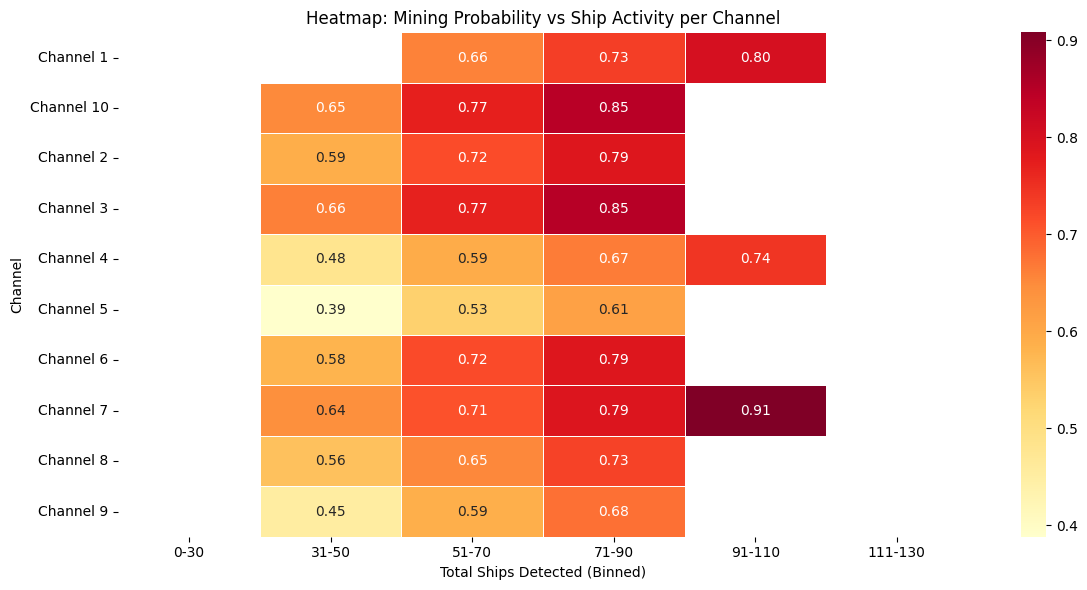

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler # Import StandardScaler
from sklearn.neural_network import MLPRegressor # Import MLPRegressor

# Load the dataset
df = pd.read_csv("naval_mine_warfare_dataset.csv")

# Selected the SAME features used during training
features = ['Depth_Score', 'Frigates_Score', 'Corvettes_Score', 'Attack_Boats_Score', 'Submarines_Score', 'Aircraft_Score', 'Amphibious_Ships_Score', 'Autonomous_Vehicles_Score', 'Civil_Boats_Score', 'Auxiliary_Ships_Score']
X_predict = df[features]  # Ensure order matches training!

# Define and fit the scaler
scaler = StandardScaler()
X_train = df[features] # Use the whole dataset for fitting the scaler for prediction
scaler.fit(X_train)


# Add the 'Predicted_Probability' column to the DataFrame
df["Predicted_Probability"] = ann_model.predict(X_predict_scaled)

df["Total_Ships"] = (
    df["Frigates"] + df["Corvettes"] + df["Attack_Boats"] + df["Submarines"] +
    df["Aircraft"] + df["Amphibious_Ships"] + df["Autonomous_Vehicles"] +
    df["Civil_Boats"] + df["Auxiliary_Ships"]
)

# Bin the total ships
df["Ship_Bins"] = pd.cut(df["Total_Ships"], bins=[0,30,50,70,90,110,130], labels=["0-30","31-50","51-70","71-90","91-110","111-130"])

# Group and pivot
heatmap_data = df.groupby(["Channel", "Ship_Bins"])["Predicted_Probability"].mean().unstack()

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Heatmap: Mining Probability vs Ship Activity per Channel")
plt.ylabel("Channel")
plt.xlabel("Total Ships Detected (Binned)")
plt.tight_layout()
plt.show()

In [148]:
# MACHINE LEARNING MODELS
# STEP 1 - PREPARATION
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("naval_mine_warfare_dataset.csv")
df.head()

,Channel,Day,Depth,Length,Width,Frigates,Corvettes,Attack_Boats,Submarines,Aircraft,...,Frigates_Score,Corvettes_Score,Attack_Boats_Score,Submarines_Score,Aircraft_Score,Amphibious_Ships_Score,Autonomous_Vehicles_Score,Civil_Boats_Score,Auxiliary_Ships_Score,Mining_Probability
0,Channel 1,1,226,10000,500,6,4,12,3,9,...,4,3,4,5,3,2,5,5,4,0.752
1,Channel 1,2,226,10000,500,6,3,8,2,6,...,4,2,3,4,2,0,3,3,5,0.580
2,Channel 1,3,226,10000,500,2,0,15,1,10,...,1,0,5,2,4,0,3,4,2,0.526
3,Channel 1,4,226,10000,500,6,3,8,1,13,...,4,2,3,2,5,2,2,5,2,0.598
4,Channel 1,5,226,10000,500,5,0,4,2,11,...,3,0,1,4,4,3,4,4,2,0.616


In [149]:
# STEP 2 SELECT FEATURES and TARGET
# Input Features (X): 10 scored features
X = df[[
    "Depth_Score", "Frigates_Score", "Corvettes_Score",
    "Attack_Boats_Score", "Submarines_Score", "Aircraft_Score",
    "Amphibious_Ships_Score", "Autonomous_Vehicles_Score",
    "Civil_Boats_Score", "Auxiliary_Ships_Score"
]]

# Target variable (y) Mining Probability
y = df["Mining_Probability"]

# Confirm shape
print("Input shape:", X.shape)
print("Target shape:", y.shape)

Input shape: (3650, 10)
Target shape: (3650,)


In [150]:
# STEP 3  Split the data into training and testing sets
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Confirm the shapes
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 2920
Testing set size: 730


In [151]:
# STEP 4  FEATURE SCALING (Required for SVM and ANN)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed")
print("Scaled training set:", X_train_scaled.shape)
print("Scaled testing set:", X_test_scaled.shape)

Feature scaling completed
Scaled training set: (2920, 10)
Scaled testing set: (730, 10)


In [152]:
# MODEL 1
# DECISION TREE REGRESSOR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

#  Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(
    random_state=42,     # Ensures reproducibility
    max_depth=5          # Controls model complexity
)

#  Train the model
dt_model.fit(X_train, y_train)

#  Predict on the test set
y_pred_dt = dt_model.predict(X_test)

#  Evaluate using R² Score (as per the referenced paper)
r2_dt = r2_score(y_test, y_pred_dt)

#  Display the result
print(f"Decision Tree Regressor R² Score: {r2_dt:.3f}")

Decision Tree Regressor R² Score: 0.784


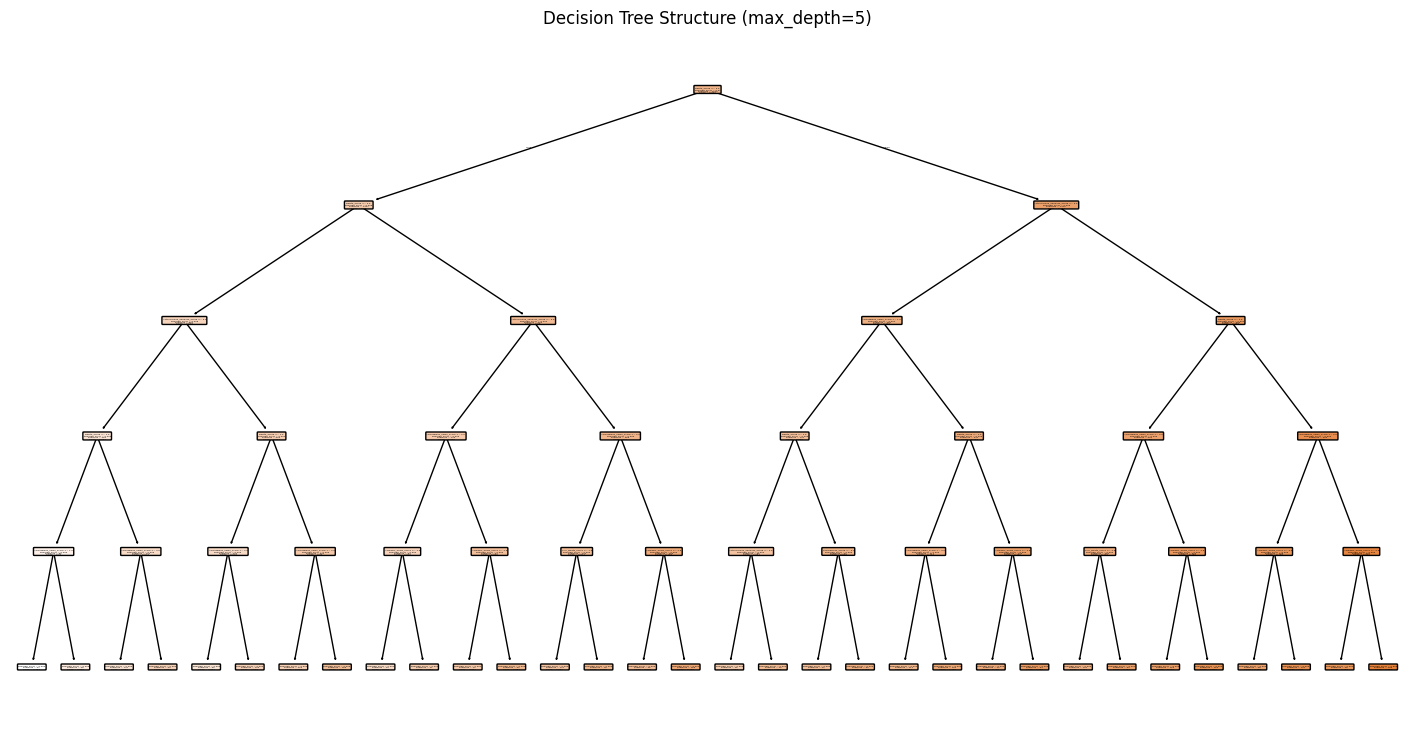

Decision Tree Visualization R² Score: 0.784


In [153]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Initialize and train the Decision Tree Regressor
tree = DecisionTreeRegressor(
    max_depth=5,       # Limits tree depth to reduce overfitting
    random_state=42    # Ensures reproducibility
)
tree.fit(X_train, y_train)

# Visualize the trained decision tree
plt.figure(figsize=(18, 9))
plot_tree(
    tree,
    feature_names=X_train.columns,
    filled=True,
    rounded=True
)
plt.title("Decision Tree Structure (max_depth=5)")
plt.show()

# Evaluate and print R² Score
print(f"Decision Tree Visualization R² Score: {tree.score(X_test, y_test):.3f}")

In [154]:
# RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,     # Number of trees (as referenced in the paper)
    max_depth=5,          # Matches Decision Tree depth for consistency
    min_samples_leaf=3,   # Controls leaf size to reduce overfitting
    random_state=42       # Ensures reproducibility
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate using R² Score
r2_rf = r2_score(y_test, y_pred_rf)

# Display results
print(f"Random Forest Regressor R² Score: {r2_rf:.3f}")
print(f"Improvement over Decision Tree: {r2_rf - r2_dt:.3f}")

Random Forest Regressor R² Score: 0.825
Improvement over Decision Tree: 0.041


In [155]:
# SVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Step 1: Scale features (critical for SVR performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Initialize SVR with optimized parameters
svr_model = SVR(
    kernel='rbf',       # Radial basis function for non-linear modeling
    C=1.0,              # Regularization parameter
    epsilon=0.1,        # Defines the margin of tolerance
    gamma='scale'       # Automatically adjusts to feature scale
)

# Step 3: Train the model
svr_model.fit(X_train_scaled, y_train)

# Step 4: Predict and evaluate
y_pred_svr = svr_model.predict(X_test_scaled)
r2_svr = r2_score(y_test, y_pred_svr)

# Step 5: Display results
print(f"SVR R² Score: {r2_svr:.3f}")
print(f"Improvement over Random Forest: {r2_svr - r2_rf:.3f}")

SVR R² Score: 0.823
Improvement over Random Forest: -0.001


In [156]:
# MODEL 4
# K-Nearest Neighbors Regressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Scale the features (like we did for SVR)
scaler_knn = StandardScaler()
X_train_knn = scaler_knn.fit_transform(X_train)
X_test_knn = scaler_knn.transform(X_test)

# Initialize the model (default K=5)
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model (KNN doesn't actually train, just stores data)
knn_model.fit(X_train_knn, y_train)

# Predict on test set
y_pred_knn = knn_model.predict(X_test_knn)

# Evaluate R² Score
from sklearn.metrics import r2_score
r2_knn = r2_score(y_test, y_pred_knn)

# Print result
print(f" K-Nearest Neighbors Regressor R² Score: {r2_knn:.4f}")

 K-Nearest Neighbors Regressor R² Score: 0.8864


In [157]:
# ARTIFICIAL NEURAL NETWORK (ANN)
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Step 1: Scale features (critical for ANN performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Initialize the ANN model with optimized architecture
ann_model = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),  # Three hidden layers
    activation='relu',                 # Suitable for regression tasks
    solver='adam',                     # Adaptive optimizer
    batch_size=256,                    # Controls training speed and stability
    max_iter=1000,                     # Ensures convergence
    random_state=42,                   # Reproducibility
    early_stopping=True,              # Stops training when validation score stops improving
    validation_fraction=0.1           # Fraction of training data for validation
)

# Step 3: Train the model
ann_model.fit(X_train_scaled, y_train)

# Step 4: Predict and evaluate
y_pred_ann = ann_model.predict(X_test_scaled)
r2_ann = r2_score(y_test, y_pred_ann)

# Step 5: Display results
print(f"ANN R² Score: {r2_ann:.3f}")
print(f"Improvement over SVR: {r2_ann - r2_svr:.3f}")

ANN R² Score: 0.979
Improvement over SVR: 0.156


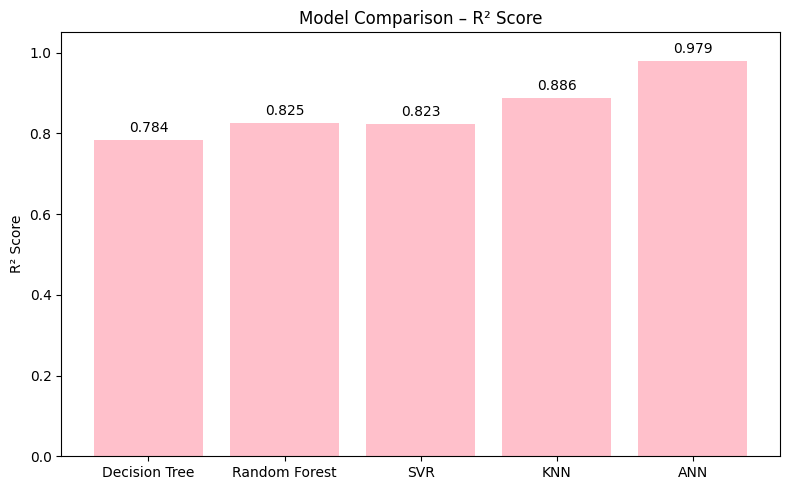

In [158]:
#MODEL COMPARISON USING R^2 SCORE
import matplotlib.pyplot as plt

# R² scores (replace with actual computed values)
models = ['Decision Tree', 'Random Forest', 'SVR', 'KNN', 'ANN']
r2_scores = [r2_dt, r2_rf, r2_svr, r2_knn, r2_ann]

# Create bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(models, r2_scores, color='pink')
plt.ylim(0, 1.05)
plt.title("Model Comparison – R² Score")
plt.ylabel("R² Score")

# Annotate bars with score values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.3f}", ha='center')

plt.tight_layout()
plt.show()

In [159]:
# Apply trained ANN model to full dataset
df["Predicted_Probability"] = ann_model.predict(scaler.transform(df[X.columns]))

# Display first few rows with predictions
df.head()

,Channel,Day,Depth,Length,Width,Frigates,Corvettes,Attack_Boats,Submarines,Aircraft,...,Corvettes_Score,Attack_Boats_Score,Submarines_Score,Aircraft_Score,Amphibious_Ships_Score,Autonomous_Vehicles_Score,Civil_Boats_Score,Auxiliary_Ships_Score,Mining_Probability,Predicted_Probability
0,Channel 1,1,226,10000,500,6,4,12,3,9,...,3,4,5,3,2,5,5,4,0.752,0.737713
1,Channel 1,2,226,10000,500,6,3,8,2,6,...,2,3,4,2,0,3,3,5,0.580,0.593877
2,Channel 1,3,226,10000,500,2,0,15,1,10,...,0,5,2,4,0,3,4,2,0.526,0.542308
3,Channel 1,4,226,10000,500,6,3,8,1,13,...,2,3,2,5,2,2,5,2,0.598,0.598526
4,Channel 1,5,226,10000,500,5,0,4,2,11,...,0,1,4,4,3,4,4,2,0.616,0.606951


In [160]:
# Group by 'Channel' and compute average predicted probability
channel_avg = df.groupby("Channel")["Predicted_Probability"].mean().reset_index()

# Sort channels by predicted probability in descending order
channel_avg = channel_avg.sort_values(by="Predicted_Probability", ascending=False)

# Display the result
channel_avg

,Channel,Predicted_Probability
3,Channel 3,0.797924
1,Channel 10,0.796776
6,Channel 6,0.742383
2,Channel 2,0.737633
7,Channel 7,0.735928
0,Channel 1,0.686709
8,Channel 8,0.677533
4,Channel 4,0.618933
9,Channel 9,0.617836
5,Channel 5,0.563920


In [161]:
channel_avg['Priority'] = (
    channel_avg['Predicted_Probability'] /
    channel_avg['Predicted_Probability'].sum())

# Sort by priority
channel_avg = channel_avg.sort_values('Priority', ascending=False)
print(channel_avg)

      Channel  Predicted_Probability  Priority
3   Channel 3               0.797924  0.114388
1  Channel 10               0.796776  0.114224
6   Channel 6               0.742383  0.106426
2   Channel 2               0.737633  0.105745
7   Channel 7               0.735928  0.105501
0   Channel 1               0.686709  0.098445
8   Channel 8               0.677533  0.097129
4   Channel 4               0.618933  0.088729
9   Channel 9               0.617836  0.088571
5   Channel 5               0.563920  0.080842


In [162]:
pip install pulp

In [163]:
# OPTIMIZATION PART USING LINEAR PROGRAMMING
import numpy as np
import pandas as pd
import pulp
import random
from pprint import pprint

# Step 1: ANN results dataframe (example data)
data = {
    'Channel': ['Channel 3', 'Channel 10', 'Channel 6', 'Channel 2', 'Channel 7',
                'Channel 1', 'Channel 8', 'Channel 4', 'Channel 9', 'Channel 5'],
    'Predicted_Probability': [0.798, 0.797, 0.742, 0.738, 0.736, 0.687, 0.678, 0.619, 0.618, 0.564],
    'Area': [2250, 6000, 6600, 2100, 3300, 5000, 1950, 2250, 2625, 5075],
    'Length': [5000, 15000, 11000, 7000, 8250, 10000, 6500, 9000, 10500, 14500],
    'Width': [450, 400, 600, 300, 400, 500, 300, 250, 250, 350]
}
df = pd.DataFrame(data).set_index('Channel')

ship_types = ['MWS1', 'MWS2', 'MWS3']
channels = list(df.index)

np.random.seed(42)
random.seed(42)

# Step 2: Table 20 (Single-ship assignment dataset)
mean_std_t20 = {
    'MWS1': (5, 2),
    'MWS2': (4, 2),
    'MWS3': (3, 1)
}

table20 = pd.DataFrame(index=channels, columns=ship_types)
for ch in channels:
    for s in ship_types:
        mean, std = mean_std_t20[s]
        val = int(round(np.random.normal(mean, std)))
        table20.loc[ch, s] = max(val, 0)

print("\n Table 20: Single-ship dataset (Normal μ,σ from parameters) ")
print(table20)

# Step 3: Table 21 (More-than-one-ship assignment dataset)
table21 = pd.DataFrame(index=channels, columns=ship_types)

for ch in channels:
    # MWS3 first (μ=2, σ=1, at least 1)
    mws3 = max(int(round(np.random.normal(2, 1))), 1)

    # MWS2 rules
    if mws3 > 1:
        mws2 = random.randint(2, 3)
    else:
        mws2 = random.randint(1, 2)

    # MWS1 rules
    if mws2 <= 2:
        mws1 = random.randint(2, 3)
    else:
        mws1 = random.randint(1, 2)

    table21.loc[ch] = [mws1, mws2, mws3]

table21 = table21.astype(int)

print("\n Table 21: More-than-one-ship dataset (randomized rules) ")
print(table21)

# Lower bounds for LP
min_ships_table21 = table21.to_dict(orient='index')

#  Step 4 LP Optimization (Table 22)
# Per-ship coverage capacity (explained in report as speed × sweep width × cleaning time)
a_capacity = {
    'MWS1': 12000,  # smaller, slower
    'MWS2': 20000,  # fastest/best coverage
    'MWS3': 15000   # mid-range
}

# Per-ship costs (random)
cost = {
    'MWS1': 30_000_000,
    'MWS2': 45_000_000,
    'MWS3': 40_000_000
}

# Fleet caps
fleet_caps = {
    'MWS1': 30,
    'MWS2': 30,
    'MWS3': 30
}

# LP model
prob = pulp.LpProblem("MWS_Allocation", pulp.LpMinimize)

# Decision variables
x = {(ch, s): pulp.LpVariable(f"x_{ch.replace(' ', '')}_{s}", lowBound=0, cat='Integer')
     for ch in channels for s in ship_types}

# Objective: Minimize total cost
prob += pulp.lpSum(cost[s] * x[(ch, s)] for ch in channels for s in ship_types)

# At least one ship per channel
for ch in channels:
    prob += pulp.lpSum(x[(ch, s)] for s in ship_types) >= 1

# Lower bounds from Table 21
for ch in channels:
    for s in ship_types:
        prob += x[(ch, s)] >= min_ships_table21[ch][s]

# Coverage constraint: each channel’s capacity ≥ its area
for ch in channels:
    area_req = df.loc[ch, 'Area']
    prob += pulp.lpSum(x[(ch, s)] * a_capacity[s] for s in ship_types) >= area_req

# Fleet caps
for s in ship_types:
    prob += pulp.lpSum(x[(ch, s)] for ch in channels) <= fleet_caps[s]

# Solve
solver = pulp.PULP_CBC_CMD(msg=False)
prob.solve(solver)

# Step 5 Results Table 22
alloc = {ch: {s: int(pulp.value(x[(ch, s)])) for s in ship_types} for ch in channels}
totals = {s: sum(alloc[ch][s] for ch in channels) for s in ship_types}
total_cost = sum(totals[s] * cost[s] for s in ship_types)

table22 = pd.DataFrame(alloc).T
print("\n Table 22: Optimized allocation (LP result) ")
print(table22)

print("\nTotals per ship type:")
pprint(totals)
print(f"Total Cost = ${total_cost:,.0f}")


 Table 20: Single-ship dataset (Normal μ,σ from parameters) 
           MWS1 MWS2 MWS3
Channel 3     6    4    4
Channel 10    8    4    3
Channel 6     8    6    3
Channel 2     6    3    3
Channel 7     5    0    1
Channel 1     4    2    3
Channel 8     3    1    4
Channel 4     5    4    2
Channel 9     4    4    2
Channel 5     6    3    3

 Table 21: More-than-one-ship dataset (randomized rules) 
            MWS1  MWS2  MWS3
Channel 3      2     1     1
Channel 10     1     3     4
Channel 6      2     2     2
Channel 2      2     1     1
Channel 7      1     3     3
Channel 1      2     1     1
Channel 8      2     2     2
Channel 4      2     1     1
Channel 9      2     2     1
Channel 5      2     3     2

 Table 22: Optimized allocation (LP result) 
            MWS1  MWS2  MWS3
Channel 3      2     1     1
Channel 10     1     3     4
Channel 6      2     2     2
Channel 2      2     1     1
Channel 7      1     3     3
Channel 1      2     1     1
Channel 8      2     2   